In [2]:
# %matplotlib inline  
import import_hack
import numpy as np
import core.steps as steps
from core import data_store as ds
from core import transformer as tr
from core.common.ds_utils import print_ds_items_info
from core.evaluation.retrieval_perfomance import extract_perfomances_from_arr
from core.common.path_helper import DataStoreHelper
import math, os
%load_ext autoreload
%autoreload 2

In [3]:
ds_helper=DataStoreHelper(r'C:\data\computation\brodatz')

# Plot exhaustive search perfomance with respect to memory

In [4]:
def define_memory_per_descriptor(descriptor_name):
    if 'product' in descriptor_name or 'bincount' in descriptor_name:
        pq_params=ds_helper.extract_pq_params_from_descriptor_name(descriptor_name)
        m=pq_params['n_quantizers']
        K=pq_params['n_clusters']
        if 'product' in descriptor_name:
            mem=m*K*4
        elif 'bincount' in descriptor_name:
            mem=(K**m)*4
    elif 'lbp' in descriptor_name:
        mem=512*4
    elif 'hist' in descriptor_name:
        mem=256*4
    elif 'glcm' in descriptor_name:
        mem=256*256*4
   
    return mem

In [5]:
def plot_ex_search_perfomance_memory(descriptor_names, perfomance_type, n_nearest_cutoff, save_to_file=False):
    subplotname__label__x__y = {}
    label__x__y=subplotname__label__x__y.setdefault('',{})
    label__kwargs={}
    for descriptor_name in descriptor_names:
        perfomances_ds = ds_helper.ex_search_perfomances_ds(descriptor_name)
        perfomances_arr=ds_helper.perfomance_arr(perfomances_ds)
        y_arr = [extract_perfomances_from_arr(perfomances_arr, perfomance_type)[n_nearest_cutoff]]
        label = descriptor_name
        mem=define_memory_per_descriptor(descriptor_name)
        x_arr=[mem]
        x__y=dict(zip(x_arr,y_arr))
        label__x__y[label]=x__y
        label__kwargs[label]={'markersize':9.0}

    if save_to_file:
        plot_path=ds_helper.ex_search_perfomances_memory_plot_path(perfomance_type)
    else:
        plot_path=None
    steps.plotting_step3(subplotname__label__x__y, '', str, 'bytes per descriptor', perfomance_type, save_to_file=plot_path, label__kwargs=label__kwargs)

In [6]:
K_arr = [2 ** i for i in [4,5,6,7,8]]
m_arr = [m for m in [1, 2, 4, 8, 16]]
pq_params_arr = [{'n_clusters': K, 'n_quantizers': m} for K in K_arr for m in m_arr]

perfomance_names=['precision', 'recall', 'mAP']
descriptor_names=['histograms', 'glcms','lbphistograms']
descriptor_names+=ds_helper.bovw_descriptors_names('bovwbincounts',pq_params_arr)
descriptor_names+=ds_helper.bovw_descriptors_names('bovwproductbincounts',pq_params_arr)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=512.0, right=512.0
  'left=%s, right=%s') % (left, right))


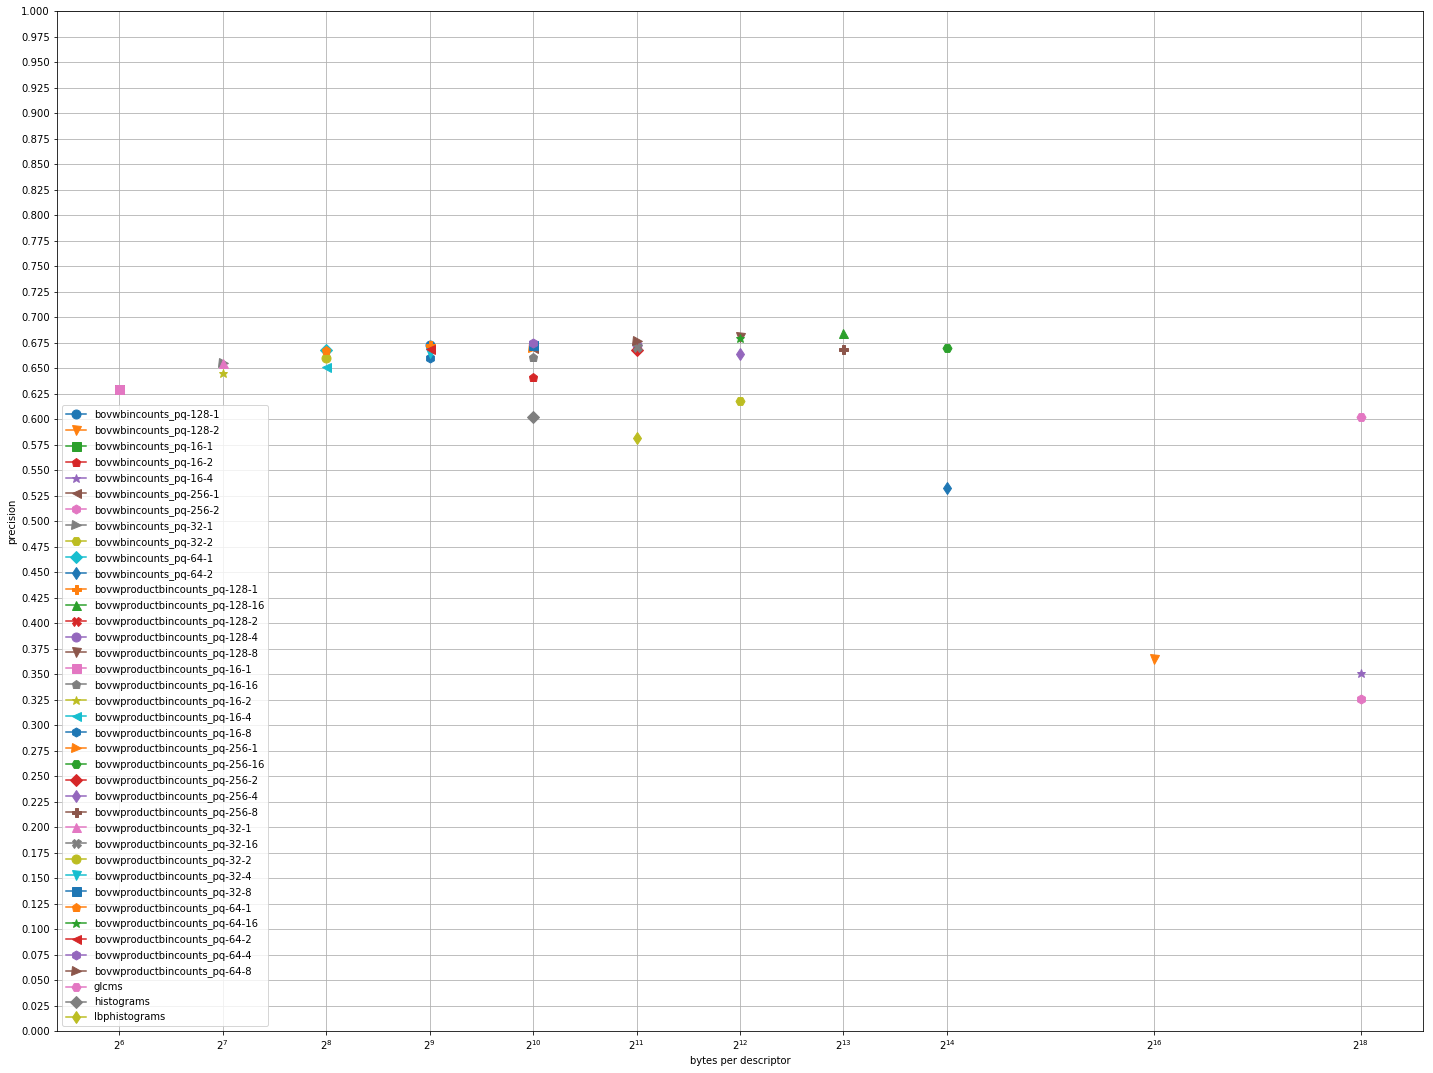

In [26]:
plot_ex_search_perfomance_memory(descriptor_names, 'precision', 10, False)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=512.0, right=512.0
  'left=%s, right=%s') % (left, right))


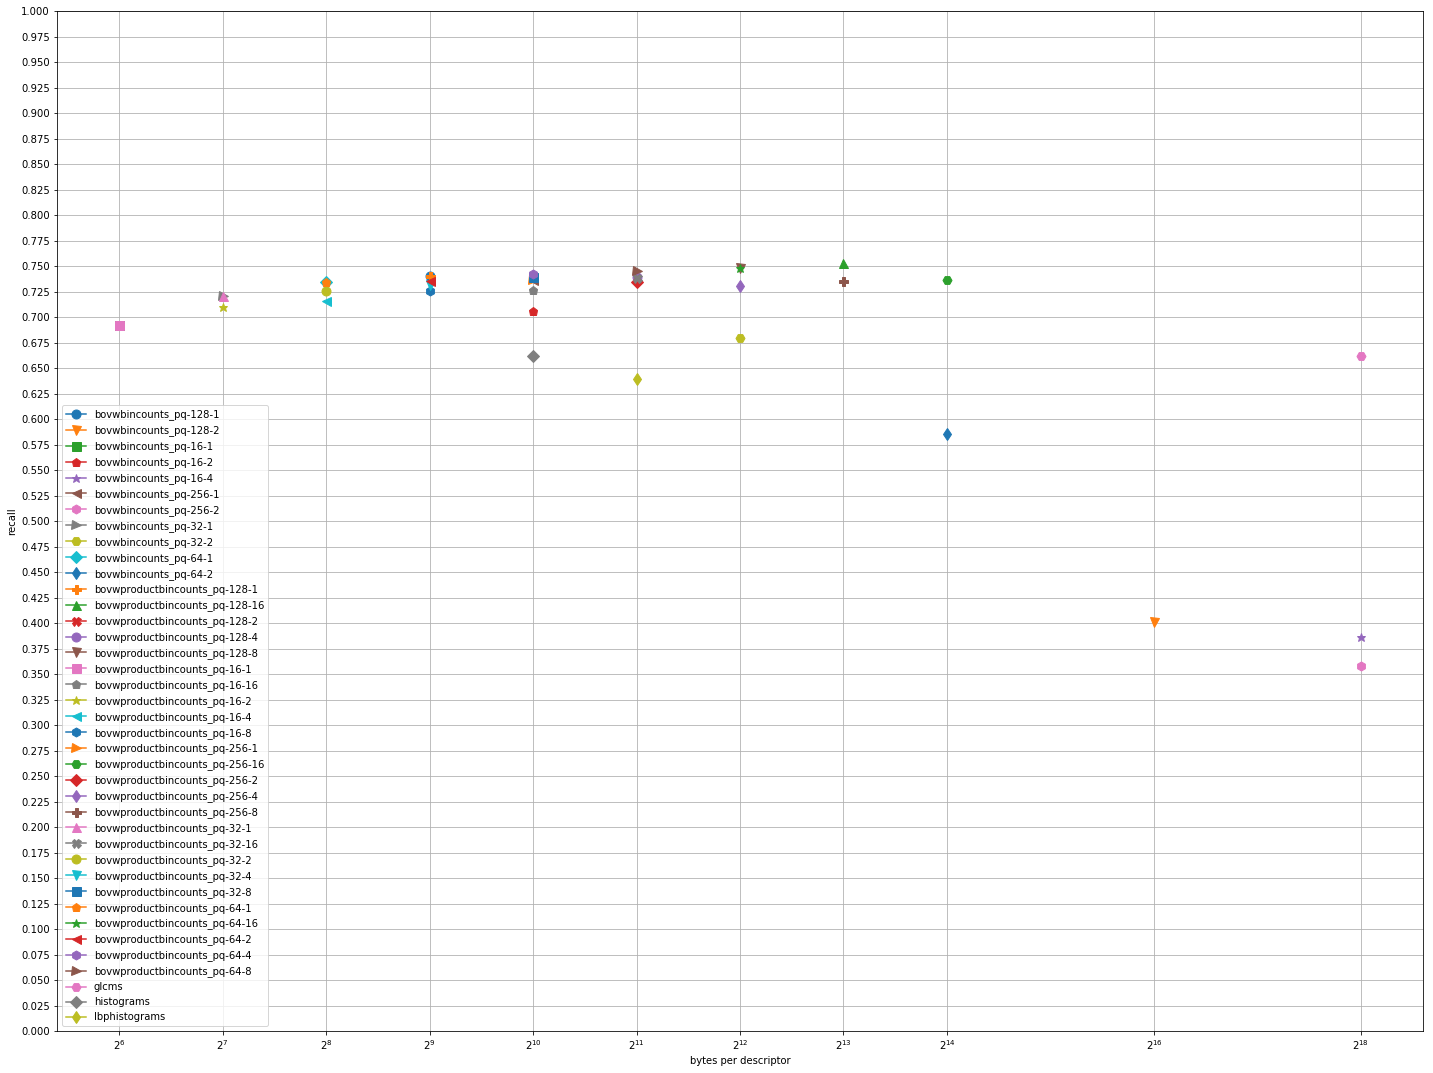

In [33]:
plot_ex_search_perfomance_memory(descriptor_names, 'recall', 10, False)

In [8]:
plot_ex_search_perfomance_memory(descriptor_names, 'precision', 10, False)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=512.0, right=512.0
  'left=%s, right=%s') % (left, right))


C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=512.0, right=512.0
  'left=%s, right=%s') % (left, right))


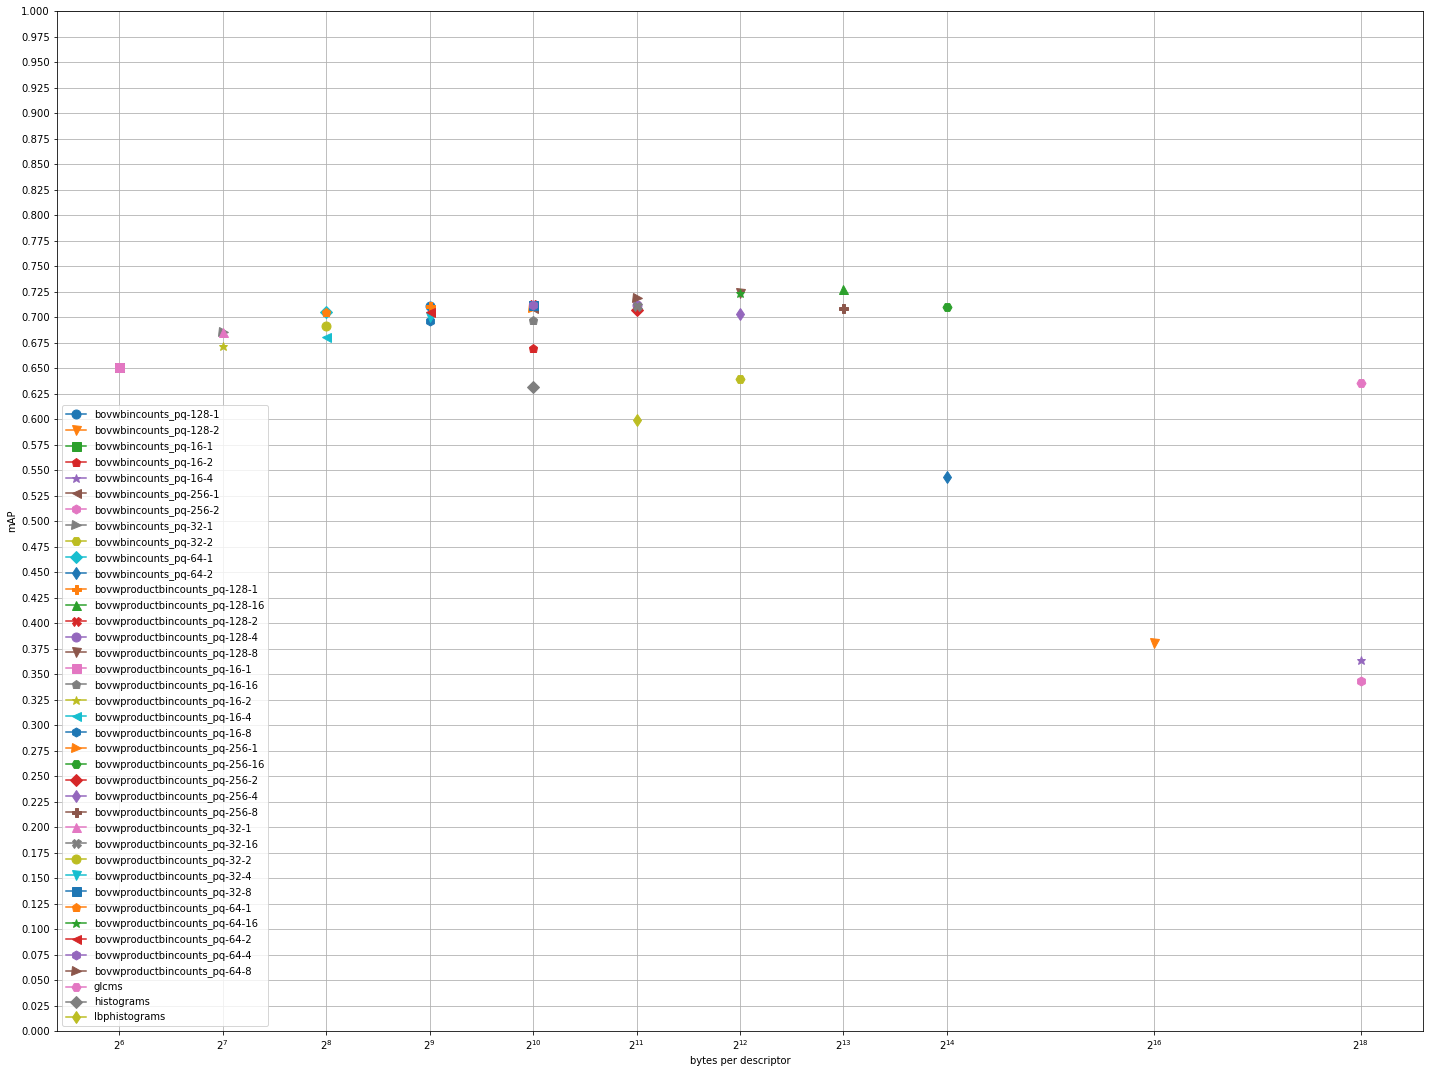

In [29]:
plot_ex_search_perfomance_memory(descriptor_names, 'mAP', 10, False)

In [54]:
for perfomance_name in perfomance_names:
    plot_ex_search_perfomance_memory(descriptor_names, perfomance_name, 9, save_to_file=True)

### There are too many types of descriptors(constructed  as bovws). Lets retain only most interesting

In [49]:
K_arr = [2 ** i for i in [4,5,6,7,8]]
m_arr = [m for m in [1, 2, 4, 8, 16]]
pq_params_arr = [{'n_clusters': K, 'n_quantizers': m} for K in K_arr for m in m_arr]

In [50]:
descriptor_names=['histograms', 'glcms','lbphistograms']
descriptor_names+=ds_helper.bovw_descriptors_names('bovwbincounts',pq_params_arr)
descriptor_names+=ds_helper.bovw_descriptors_names('bovwproductbincounts',pq_params_arr)

In [51]:
plot_ex_search_perfomance_memory(descriptor_names, 'precision', 9, False)

In [42]:
for perfomance_name in perfomance_names:
    plot_ex_search_perfomance_memory(descriptor_names, perfomance_name, 9, save_to_file=True)

In [9]:
choosen_bovwproductbincounts_pq_params= [{'n_clusters': K, 'n_quantizers': m} for K,m in [(64,4),(128,1),(16,1)]]

In [10]:
choosen_bovwproductbincounts_pq_params

[{'n_clusters': 64, 'n_quantizers': 4},
 {'n_clusters': 128, 'n_quantizers': 1},
 {'n_clusters': 16, 'n_quantizers': 1}]